# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [335]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [336]:
# from google.colab import drive
# drive.mount('/content/drive')

In [337]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [338]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

# 필요하다고 판단되는 라이브러리를 추가하세요.

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl

In [383]:
file1 = 'data1.pkl'
df = joblib.load(file1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2923 non-null   datetime64[ns]
 1   car_cnt                 2923 non-null   int64         
 2   request_cnt             2923 non-null   int64         
 3   ride_cnt                2923 non-null   int64         
 4   waiting_time            2923 non-null   float64       
 5   fare                    2923 non-null   int64         
 6   distance                2923 non-null   int64         
 7   year                    2923 non-null   int64         
 8   month                   2923 non-null   int64         
 9   week                    2923 non-null   int64         
 10  weekday                 2923 non-null   int64         
 11  yesterday_waiting_time  2923 non-null   float64       
 12  temp_max                2923 non-null   float64 

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [384]:
# 결측치 없음
df.isna().sum().sum()

0

### (2) 가변수화

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2923 non-null   datetime64[ns]
 1   car_cnt                 2923 non-null   int64         
 2   request_cnt             2923 non-null   int64         
 3   ride_cnt                2923 non-null   int64         
 4   waiting_time            2923 non-null   float64       
 5   fare                    2923 non-null   int64         
 6   distance                2923 non-null   int64         
 7   year                    2923 non-null   int64         
 8   month                   2923 non-null   int64         
 9   week                    2923 non-null   int64         
 10  weekday                 2923 non-null   int64         
 11  yesterday_waiting_time  2923 non-null   float64       
 12  temp_max                2923 non-null   float64 

In [386]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dumm_cols = ['Season', 'distance_category']

# 가변수화
df = pd.get_dummies(df, columns=dumm_cols, drop_first=True)

# 확인
display(df.head())
print(df.info())

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,yesterday_waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),HolidayName,rolling_mean,ride_rate,Season_Spring,Season_Summer,Season_Winter,distance_category_8000-9000,distance_category_9000-10000,distance_category_10000-11000,distance_category_11000-12000,distance_category_12000-13000,distance_category_13000-14000,distance_category_14000-15000
0,2015-01-01,213,1023,924,23.2,2427,10764,2015,1,1,3,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,1.0,22.775000,90.322581,0,0,1,0,0,1,0,0,0,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,2015,1,1,4,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,0.0,23.460000,89.898670,0,0,1,1,0,0,0,0,0,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,2015,1,1,5,24.5,2.4,-9.2,0.0,73.0,37.0,8.66,0.0,23.483333,91.868932,0,0,1,0,0,1,0,0,0,0
3,2015-01-04,196,1646,1526,24.5,2431,10955,2015,1,1,6,26.2,8.2,0.2,0.0,89.0,58.0,5.32,0.0,23.657143,92.709599,0,0,1,0,0,1,0,0,0,0
4,2015-01-05,421,4250,3730,26.2,2214,8663,2015,1,2,0,23.6,7.9,-0.9,0.0,95.0,52.0,6.48,0.0,23.371429,87.764706,0,0,1,1,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 0 to 2922
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           2923 non-null   datetime64[ns]
 1   car_cnt                        2923 non-null   int64         
 2   request_cnt                    2923 non-null   int64         
 3   ride_cnt                       2923 non-null   int64         
 4   waiting_time                   2923 non-null   float64       
 5   fare                           2923 non-null   int64         
 6   distance                       2923 non-null   int64         
 7   year                           2923 non-null   int64         
 8   month                          2923 non-null   int64         
 9   week                           2923 non-null   int64         
 10  weekday                        2923 non-null   int64         
 11  yesterday_waiting

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [387]:
# train_test = df_for_model[df_for_model['Date'] < '2022-10-01']
# val = df_for_model[df_for_model['Date'] > '2022-10-01' ]

In [388]:
# val.reset_index(drop=True).head(2)

In [389]:
# train_test.reset_index(drop=True).head(2)

#### 1) x, y 나누기

In [390]:
df.drop(columns='Date', inplace=True)

In [348]:
y = df['yesterday_waiting_time']
x = df.drop(columns='yesterday_waiting_time')

In [349]:
display(x.head(2))
display(y.head(2))

,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,year,month,week,weekday,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),HolidayName,rolling_mean,ride_rate,Season_Spring,Season_Summer,Season_Winter,distance_category_8000-9000,distance_category_9000-10000,distance_category_10000-11000,distance_category_11000-12000,distance_category_12000-13000,distance_category_13000-14000,distance_category_14000-15000
0,213,1023,924,23.2,2427,10764,2015,1,1,3,-4.3,-9.8,0.0,52.0,33.0,9.79,1.0,22.775,90.322581,0,0,1,0,0,1,0,0,0,0
1,420,3158,2839,17.2,2216,8611,2015,1,1,4,-2.0,-8.9,0.0,63.0,28.0,9.07,0.0,23.460,89.898670,0,0,1,1,0,0,0,0,0,0


0    17.2
1    26.2
Name: yesterday_waiting_time, dtype: float64

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [391]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=91, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1)


# x_train: 훈련 데이터의 특성
# x_val: 검증 데이터의 특성
# y_train: 훈련 데이터의 타겟(목표) 값
# y_val: 검증 데이터의 타겟(목표) 값


In [392]:
x_test.shape

(850, 29)

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [393]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ls = ['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare', 'distance', 'temp_max', 'temp_min',
      'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)', 'ride_rate', 'rolling_mean']

# Fit and transform the scaler on the specified columns in x_train
x_train[ls] = scaler.fit_transform(x_train[ls])
x_val[ls] = scaler.transform(x_val[ls])
# Transform the same columns in x_test using the same scaler
x_test[ls] = scaler.transform(x_test[ls])


## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝

#### 1) 모델1 LinearRegression

In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
modelLR = LinearRegression()
modelLR.fit(x_train, y_train)
result = {}

In [404]:
y_pred = modelLR.predict(x_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

R2: 0.766456276233786
MAE: 4.9224151099392115
MAPE: 0.1285594792189027


In [405]:
y_pred_val= modelLR.predict(x_val)
print('R2:', r2_score(y_val, y_pred_val))
print('MAE:', mean_absolute_error(y_val, y_pred_val))
print('MAPE:', mean_absolute_percentage_error(y_val, y_pred_val))

# 기록
result['LinearRegression'] = [r2_score(y_val, y_pred_val), mean_absolute_error(y_val, y_pred_val), mean_absolute_percentage_error(y_val, y_pred_val)]
result

R2: 0.23130519344631584
MAE: 4.052575094446417
MAPE: 0.10359463115954622


{'LinearRegression': [0.23130519344631584,
  4.052575094446417,
  0.10359463115954622]}

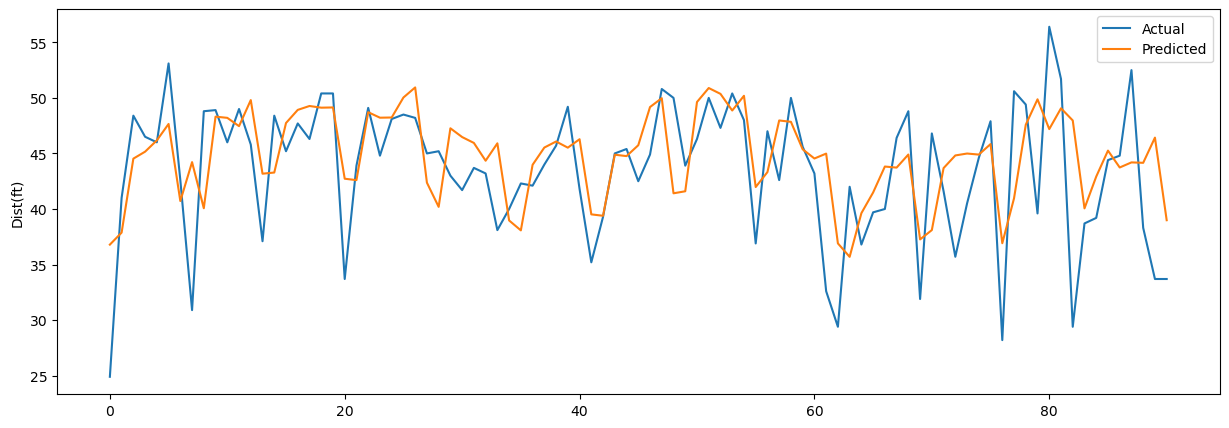

In [406]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(y_val.values, label='Actual')
plt.plot(y_pred_val, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()

#### 2) 모델2

In [397]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}
# Create the Random Forest Regressor model
rf_model = RandomForestRegressor()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_grid, 
    n_iter=10,  # You can adjust the number of iterations as needed
    scoring='neg_mean_absolute_error',  # Use the scoring metric of your choice
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallelism
)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best parameters and estimator
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'n_estimators': 200, 'max_depth': 50}
Best Estimator: RandomForestRegressor(max_depth=50, n_estimators=200)


In [407]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=50)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200)

In [408]:
y_pred_val = rf_model.predict(x_val)
print('R2:', r2_score(y_val, y_pred_val))
print('MAE:', mean_absolute_error(y_val, y_pred_val))
print('MAPE:', mean_absolute_percentage_error(y_val, y_pred_val))

# 기록
result['RandomForestRegressor'] = [r2_score(y_val, y_pred_val), mean_absolute_error(y_val, y_pred_val), mean_absolute_percentage_error(y_val, y_pred_val)]
result

R2: 0.21305635720474592
MAE: 3.9159120879120874
MAPE: 0.09972218975003148


{'LinearRegression': [0.23130519344631584,
  4.052575094446417,
  0.10359463115954622],
 'RandomForestRegressor': [0.21305635720474592,
  3.9159120879120874,
  0.09972218975003148]}

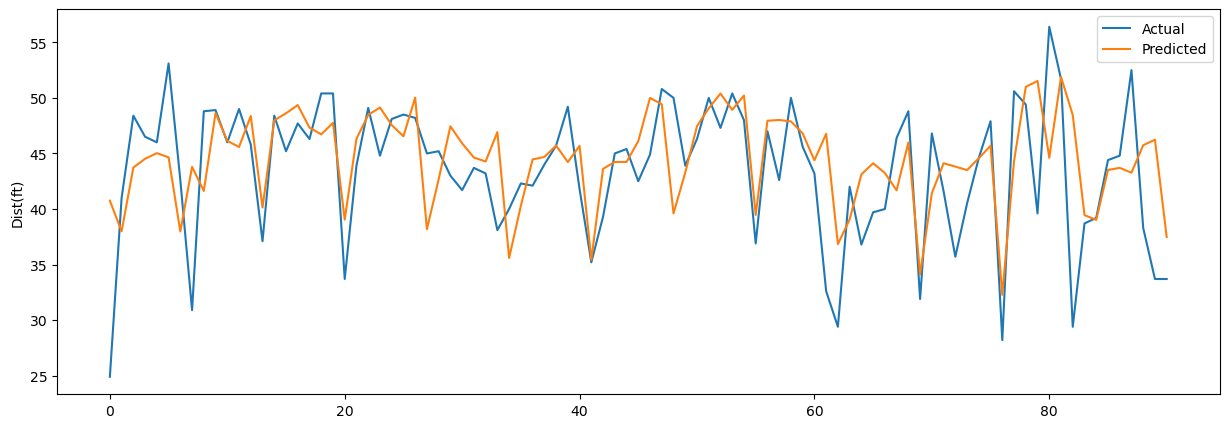

In [409]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(y_val.values, label='Actual')
plt.plot(y_pred_val, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()

### 3) 모델 3 GradientBoostingRegressor

In [411]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    # Add other hyperparameters to tune if needed
}

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model, 
    param_distributions=param_grid, 
    n_iter=10,  # You can adjust the number of iterations as needed
    scoring='neg_mean_absolute_error',  # Use the scoring metric of your choice
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores for parallelism
)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='neg_mean_absolute_error')

In [412]:
# Get the best parameters and best estimator from the search
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best parameters and estimator
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Estimator: GradientBoostingRegressor(max_depth=6, min_samples_leaf=4, n_estimators=200,
                          subsample=0.9)


In [413]:
gb_model = GradientBoostingRegressor(max_depth=6, min_samples_leaf=4, n_estimators=200, subsample=0.9)
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=6, min_samples_leaf=4, n_estimators=200,
                          subsample=0.9)

In [414]:
# You can now use the best_estimator for prediction or evaluation
y_pred_val = gb_model.predict(x_val)
print('R2:', r2_score(y_val, y_pred_val))
print('MAE:', mean_absolute_error(y_val, y_pred_val))
print('MAPE:', mean_absolute_percentage_error(y_val, y_pred_val))

# 기록
result['GradientBoostingRegressor'] = [r2_score(y_val, y_pred_val), mean_absolute_error(y_val, y_pred_val), mean_absolute_percentage_error(y_val, y_pred_val)]
result

R2: 0.1994930206031128
MAE: 4.155406801659545
MAPE: 0.10339722274401814


{'LinearRegression': [0.23130519344631584,
  4.052575094446417,
  0.10359463115954622],
 'RandomForestRegressor': [0.21305635720474592,
  3.9159120879120874,
  0.09972218975003148],
 'GradientBoostingRegressor': [0.1994930206031128,
  4.155406801659545,
  0.10339722274401814]}

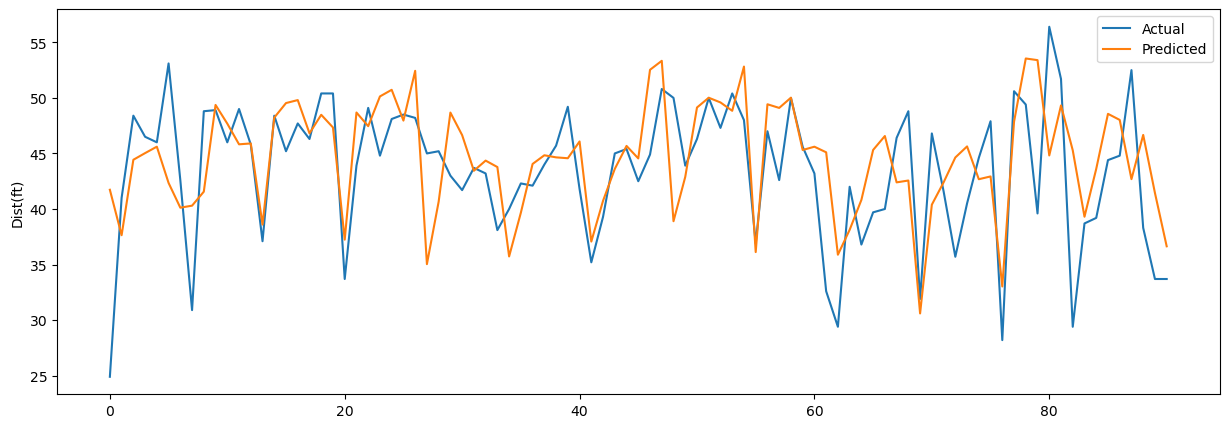

In [415]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(y_val.values, label='Actual')
plt.plot(y_pred_val, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()

In [359]:
# y_pred = modelLR.predict(x_test)
# print('R2:', r2_score(y_test, y_pred))
# print('MAE:', mean_absolute_error(y_test, y_pred))
# print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

#### 4) 모델4 KNeighborsRegressor

In [417]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# 선언하기
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelKNN.fit(x_train, y_train)

KNeighborsRegressor()

In [418]:
# You can now use the best_estimator for prediction or evaluation
y_pred_val = modelKNN.predict(x_val)
print('R2:', r2_score(y_val, y_pred_val))
print('MAE:', mean_absolute_error(y_val, y_pred_val))
print('MAPE:', mean_absolute_percentage_error(y_val, y_pred_val))

# 기록
result['KNeighborsRegressor'] = [r2_score(y_val, y_pred_val), mean_absolute_error(y_val, y_pred_val), mean_absolute_percentage_error(y_val, y_pred_val)]
result

R2: -0.870635126252939
MAE: 6.7116483516483525
MAPE: 0.1517795485828992


{'LinearRegression': [0.23130519344631584,
  4.052575094446417,
  0.10359463115954622],
 'RandomForestRegressor': [0.21305635720474592,
  3.9159120879120874,
  0.09972218975003148],
 'GradientBoostingRegressor': [0.1994930206031128,
  4.155406801659545,
  0.10339722274401814],
 'KNeighborsRegressor': [-0.870635126252939,
  6.7116483516483525,
  0.1517795485828992]}

### 5) 모델 5  Support Vector Machines

In [419]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [420]:
params = {
    'C': [0.1, 1, 10],  # C 파라미터 범위 설정 (작은 값부터 큰 값까지)
    'kernel': ['linear', 'rbf', 'poly'],  # 커널 함수 설정
    'epsilon': [0.1, 0.2, 0.5],  # epsilon 파라미터 범위 설정
}

# SVR 모델 생성
model_dt = SVR()

# Grid Search 모델 생성
model = GridSearchCV(
    model_dt,  # 기본 모델 설정
    params,  # 탐색할 하이퍼파라미터 범위
    cv=5,  # 5-폴드 교차 검증 사용
    scoring='neg_mean_absolute_error',  # 평가 지표 설정 (MAE의 음수값)
)

model.fit(x_train, y_train)

# 중요 정보 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[ -7.22082025 -11.19414474 -11.19347443  -7.2212483  -11.19420496
 -11.19351237  -7.23020877 -11.19397926 -11.19327363  -5.32819923
 -11.18445433 -11.17761759  -5.33002905 -11.184199   -11.17748076
  -5.3137377  -11.18371127 -11.17698372  -7.78071424 -11.09669711
 -11.04413865  -7.51229183 -11.09662063 -11.04514631  -7.13624053
 -11.09550733 -11.04466114]
--------------------------------------------------------------------------------
최적파라미터: {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
--------------------------------------------------------------------------------
최고성능: -5.313737697368742


In [421]:
model_dt = SVR(C= 1, epsilon= 0.5, kernel='linear')
model_dt.fit(x_train, y_train)

SVR(C=1, epsilon=0.5, kernel='linear')

In [422]:
# You can now use the best_estimator for prediction or evaluation
y_pred_val = model_dt.predict(x_val)
print('R2:', r2_score(y_val, y_pred_val))
print('MAE:', mean_absolute_error(y_val, y_pred_val))
print('MAPE:', mean_absolute_percentage_error(y_val, y_pred_val))

# 기록
result['SVR'] = [r2_score(y_val, y_pred_val), mean_absolute_error(y_val, y_pred_val), mean_absolute_percentage_error(y_val, y_pred_val)]
result

R2: 0.1488375329680085
MAE: 4.292886016811156
MAPE: 0.1097749144248414


{'LinearRegression': [0.23130519344631584,
  4.052575094446417,
  0.10359463115954622],
 'RandomForestRegressor': [0.21305635720474592,
  3.9159120879120874,
  0.09972218975003148],
 'GradientBoostingRegressor': [0.1994930206031128,
  4.155406801659545,
  0.10339722274401814],
 'KNeighborsRegressor': [-0.870635126252939,
  6.7116483516483525,
  0.1517795485828992],
 'SVR': [0.1488375329680085, 4.292886016811156, 0.1097749144248414]}

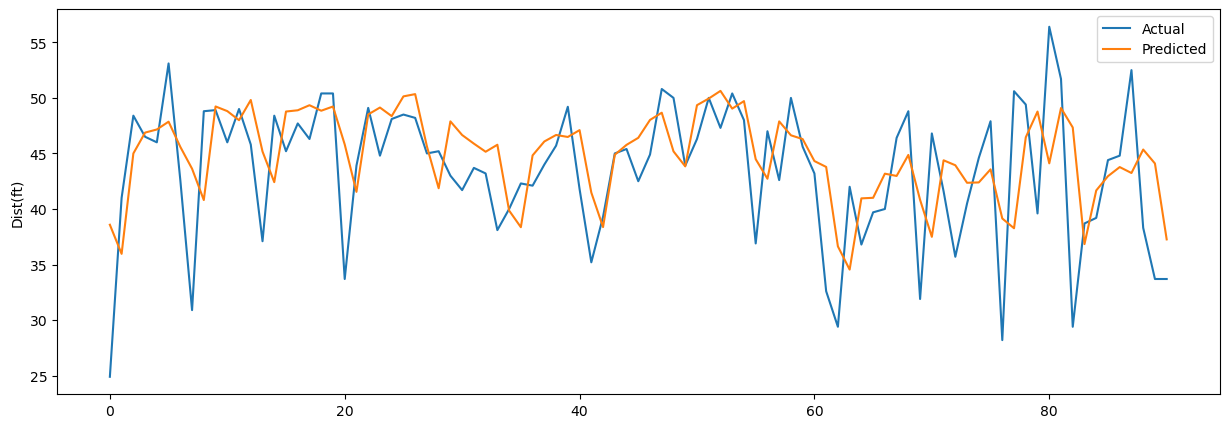

In [423]:
# 시각화
plt.figure(figsize=(15,5))
plt.plot(y_val.values, label='Actual')
plt.plot(y_pred_val, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()

### 머신 성능 비교

### (2) 딥러닝

In [365]:
print(x_train.shape, y_train.shape)

(1955, 29) (1955,)


#### 1) 모델1

In [366]:
import tensorflow as tf

# New model for regression
X = tf.keras.Input(shape=[29])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(20, activation='softmax')(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(10, activation='softmax')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(5, activation='softmax')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
Y = tf.keras.layers.Dense(1, activation='linear')(H)  # Linear activation for regression

regression_model = tf.keras.Model(X, Y)
regression_model.compile(loss='mae',  # Use mean squared error for regression
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

regression_model.summary()

# Early stopping with patience set to 10
early = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Train the new regression model
regression_result = regression_model.fit(x_train, y_train,  # Use your regression labels (y_train) here
                                        epochs=1000,
                                        batch_size=10,
                                        validation_data=(x_val, y_val),
                                        callbacks=[early])


Model: "model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_61 (InputLayer)       [(None, 29)]              0         
                                                                 
 dense_216 (Dense)           (None, 20)                600       
                                                                 
 batch_normalization_153 (B  (None, 20)                80        
 atchNormalization)                                              
                                                                 
 dropout_49 (Dropout)        (None, 20)                0         
                                                                 
 dense_217 (Dense)           (None, 10)                210       
                                                                 
 batch_normalization_154 (B  (None, 10)                40        
 atchNormalization)                                       

In [367]:
a = regression_model.evaluate(x_test, y_test)
a

28/28 [==============================] - 0s 1ms/step - loss: 11.2149


11.214949607849121

#### 2) 모델2

In [368]:
import tensorflow as tf

# New regression model with variations
X = tf.keras.Input(shape=[29])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(64, activation='relu')(H)  # Using ReLU activation
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(128, activation='relu')(H)  # Using ReLU activation
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(64, activation='relu')(H)   # Using ReLU activation
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
H = tf.keras.layers.Dense(32, activation='relu')(H)   # Using ReLU activation
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Dropout(0.5)(H)
Y = tf.keras.layers.Dense(1, activation='linear')(H)  # Linear activation for regression

regression_model_v2 = tf.keras.Model(X, Y)
regression_model_v2.compile(loss='mae',  # Use mean absolute error for regression
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))

regression_model_v2.summary()

# Early stopping with patience set to 20
early = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Train the new regression model
regression_result_v2 = regression_model_v2.fit(x_train, y_train,  # Use your regression labels (y_train) here
                                              epochs=1000,
                                              batch_size=10,
                                              validation_data=(x_val, y_val),
                                              callbacks=[early])


Model: "model_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_62 (InputLayer)       [(None, 29)]              0         
                                                                 
 flatten_48 (Flatten)        (None, 29)                0         
                                                                 
 dense_220 (Dense)           (None, 64)                1920      
                                                                 
 batch_normalization_156 (B  (None, 64)                256       
 atchNormalization)                                              
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_221 (Dense)           (None, 128)               8320      
                                                          

In [369]:
a = regression_model.evaluate(x_test, y_test)
a

28/28 [==============================] - 0s 2ms/step - loss: 11.2149


11.214949607849121

## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [424]:
result

{'LinearRegression': [0.23130519344631584,
  4.052575094446417,
  0.10359463115954622],
 'RandomForestRegressor': [0.21305635720474592,
  3.9159120879120874,
  0.09972218975003148],
 'GradientBoostingRegressor': [0.1994930206031128,
  4.155406801659545,
  0.10339722274401814],
 'KNeighborsRegressor': [-0.870635126252939,
  6.7116483516483525,
  0.1517795485828992],
 'SVR': [0.1488375329680085, 4.292886016811156, 0.1097749144248414]}

In [ ]:
# 성능이 가장 좋은 모델 = RandomForestRegressor
# [R2: 0.21305635720474592,  MAE:3.9159120879120874,  MAPE:0.09972218975003148]